In [1]:
import pandas as pd
from sklearn import tree
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import random
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')

### Data Preparation and Clean up

##### Read Data
##### Remove TNaNs
##### Generalize Data to two braod categories(1 and 3)
##### Rename  Columns
##### Reduce dataset size using sample function
##### Reduce number of columns
##### Convert categorical variable into dummy/indicator variables.

In [2]:
file = "US_births(2018).csv"

In [3]:
# Read our Data file with the pandas library

file_df = pd.read_csv(file, encoding="ISO-8859-1")

C:\Users\Mercy\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
file_df.head()
#file_df.shape

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,...,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN
0,1,1,30.7,0,3657,4,2017,1,1,1227,...,0,1,2,190,1,2,N,0,M,41
1,1,1,33.3,2,3242,99,9999,2,1,1704,...,0,2,0,188,4,2,Y,2,F,0
2,1,1,30.0,0,3470,4,2017,1,1,336,...,0,1,0,215,1,1,N,0,M,58
3,3,1,23.7,0,3140,5,2017,2,1,938,...,0,2,0,138,1,2,N,0,F,0
4,1,1,35.5,0,2125,99,9999,1,1,830,...,0,1,4,220,3,1,N,0,M,0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


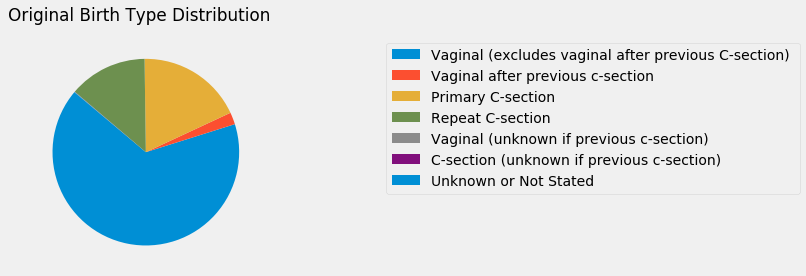

In [5]:

# Create pie chart of original dataset
pie_data_grp=file_df.groupby("RDMETH_REC")
pie_data=pie_data_grp["RDMETH_REC"].count()
pie_data


#del mouse_data_gender.index.name
pie_data_chart = pie_data.plot(kind='pie',subplots=True,legend='True',startangle=140,labels=None)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5),fontsize = 10)
plt.suptitle("Original Birth Type Distribution")
plt.ylabel(" ")
plt.legend(['Vaginal (excludes vaginal after previous C-section) ','Vaginal after previous c-section','Primary C-section','Repeat C-section','Vaginal (unknown if previous c-section)','C-section (unknown if previous c-section)','Unknown or Not Stated','Not Reported',''],bbox_to_anchor=(1.5, 1),loc='upper left')
plt.savefig('originBirthdata.png')

In [6]:
file_df = file_df.dropna()

In [7]:
# Limit data to known recorded delivery methods only 
delivery_method = file_df[file_df['RDMETH_REC'].isin(['1','2','3','4','5','6']) ]
delivery_method.head()

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,...,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN
0,1,1,30.7,0,3657,4,2017,1,1,1227,...,0,1,2,190,1,2,N,0,M,41
1,1,1,33.3,2,3242,99,9999,2,1,1704,...,0,2,0,188,4,2,Y,2,F,0
2,1,1,30.0,0,3470,4,2017,1,1,336,...,0,1,0,215,1,1,N,0,M,58
3,3,1,23.7,0,3140,5,2017,2,1,938,...,0,2,0,138,1,2,N,0,F,0
4,1,1,35.5,0,2125,99,9999,1,1,830,...,0,1,4,220,3,1,N,0,M,0


In [8]:
# print number of rows and columns in dataset
delivery_method.shape

(3799906, 55)

In [9]:
# Update delivery method to have only Cesareans and Vaginal birth
# delivery_method = delivery_method["RDMETH_REC"].replace({2:1, 4:3, 5:1, 6:3}, inplace=True)
delivery_method['RDMETH_REC'] = np.where((delivery_method.RDMETH_REC == 2),1,delivery_method.RDMETH_REC)
delivery_method['RDMETH_REC'] = np.where((delivery_method.RDMETH_REC == 4),3,delivery_method.RDMETH_REC)
delivery_method['RDMETH_REC'] = np.where((delivery_method.RDMETH_REC == 5),1,delivery_method.RDMETH_REC)
delivery_method['RDMETH_REC'] = np.where((delivery_method.RDMETH_REC == 6),3,delivery_method.RDMETH_REC)
delivery_method.head()

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,...,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN
0,1,1,30.7,0,3657,4,2017,1,1,1227,...,0,1,2,190,1,2,N,0,M,41
1,1,1,33.3,2,3242,99,9999,2,1,1704,...,0,2,0,188,3,2,Y,2,F,0
2,1,1,30.0,0,3470,4,2017,1,1,336,...,0,1,0,215,1,1,N,0,M,58
3,3,1,23.7,0,3140,5,2017,2,1,938,...,0,2,0,138,1,2,N,0,F,0
4,1,1,35.5,0,2125,99,9999,1,1,830,...,0,1,4,220,3,1,N,0,M,0


In [10]:
# Limit the columns to only mother related columns. Eliminate father and baby columns
# https://wonder.cdc.gov/wonder/help/Natality-expanded.html#Delivery-Method
delivery_method = delivery_method[['RDMETH_REC','ATTEND','CIG_0','BMI','DMAR','LD_INDL','MAGER','M_Ht_In','NO_INFEC','NO_RISKS'
                                    ,'NO_MMORB','PWgt_R','WTGAIN','RF_CESAR','RF_CESARN','PRIORDEAD','PRIORLIVE','PRIORTERM']]
delivery_method.head()

,RDMETH_REC,ATTEND,CIG_0,BMI,DMAR,LD_INDL,MAGER,M_Ht_In,NO_INFEC,NO_RISKS,NO_MMORB,PWgt_R,WTGAIN,RF_CESAR,RF_CESARN,PRIORDEAD,PRIORLIVE,PRIORTERM,BFACIL
0,1,1,0,30.7,1,N,30,66,1,1,1,190,41,N,0,0,1,2,1
1,3,1,2,33.3,2,N,35,63,1,0,1,188,0,Y,2,0,2,0,1
2,1,1,0,30.0,1,N,28,71,1,0,1,215,58,N,0,0,1,0,1
3,1,3,0,23.7,2,N,23,64,1,1,1,138,0,N,0,0,2,0,1
4,3,1,0,35.5,1,N,37,66,1,1,1,220,0,N,0,0,1,4,1


In [11]:
# renaming columns
new_cols =['Delivery_Method','Medical_Attendant','Cigarette_Consumption','BMI','Marital_Status','Induction_of_labor'
               ,'Age_of_Mother','Mothers_Height_in_Inches','NO_INFEC','NO_RISK','NO_MORBIDITY','Pre_Pregnancy_Weight'
               ,'Weight_Gain','Previous_Cesarian','#_of_Previous_Cesareans','Prior_Births_Dead','Prior_Births_Living'
               ,'Prior_Terminations']

delivery_method.columns = new_cols

delivery_method.head()

,Delivery_Method,Medical_Attendant,Cigarette_Consumption,BMI,Marital_Status,Induction_of_labor,Age_of_Mother,Mothers_Height_in_Inches,NO_INFEC,NO_RISK,NO_MORBIDITY,Pre_Pregnancy_Weight,Weight_Gain,Previous_Cesarian,#_of_Previous_Cesareans,Prior_Births_Dead,Prior_Births_Living,Prior_Terminations,Birth_Place
0,1,1,0,30.7,1,N,30,66,1,1,1,190,41,N,0,0,1,2,1
1,3,1,2,33.3,2,N,35,63,1,0,1,188,0,Y,2,0,2,0,1
2,1,1,0,30.0,1,N,28,71,1,0,1,215,58,N,0,0,1,0,1
3,1,3,0,23.7,2,N,23,64,1,1,1,138,0,N,0,0,2,0,1
4,3,1,0,35.5,1,N,37,66,1,1,1,220,0,N,0,0,1,4,1


No handles with labels found to put in legend.
No handles with labels found to put in legend.


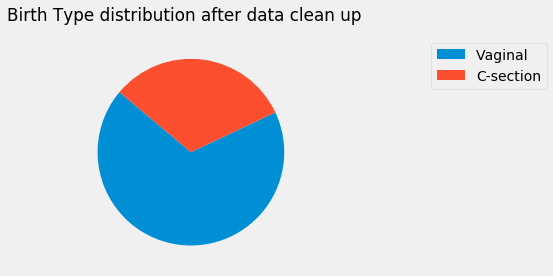

In [12]:
# Create pie chart of original dataset
pie_data_grp2=delivery_method.groupby("Delivery_Method")
pie_data2=pie_data_grp2["Delivery_Method"].count()
pie_data2


#del mouse_data_gender.index.name
pie_data_chart2 = pie_data2.plot(kind='pie',subplots=True,legend='True',startangle=140,labels=None)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5),fontsize = 10)
plt.legend(['Vaginal','C-section'],bbox_to_anchor=(1.5, 1),loc='upper left')
plt.suptitle("Birth Type distribution after data clean up")
plt.ylabel(" ")
plt.savefig('CleanedBirthdata.png')

In [13]:
# Reduce the dataset size by selecting random 100000 rows to work with
delivery_method_df = delivery_method.sample(n=100000)
#save to excel
delivery_method_df.to_csv('delivery_predictionbiased.csv')
delivery_method_df.head()

,Delivery_Method,Medical_Attendant,Cigarette_Consumption,BMI,Marital_Status,Induction_of_labor,Age_of_Mother,Mothers_Height_in_Inches,NO_INFEC,NO_RISK,NO_MORBIDITY,Pre_Pregnancy_Weight,Weight_Gain,Previous_Cesarian,#_of_Previous_Cesareans,Prior_Births_Dead,Prior_Births_Living,Prior_Terminations,Birth_Place
2649220,3,1,10,27.0,2,N,29,58,1,0,1,129,29,Y,1,0,1,0,1
1270211,1,1,0,20.7,1,N,26,67,1,1,1,132,31,N,0,0,0,0,1
3161370,1,1,0,23.3,1,Y,27,65,1,1,1,140,38,N,0,0,2,0,1
1374646,1,1,0,35.1,2,Y,19,62,0,1,1,192,30,N,0,0,0,0,1
1337366,3,1,20,32.2,2,Y,33,62,1,0,0,176,11,Y,4,0,4,3,1


In [14]:
delivery_method_df.dtypes

Delivery_Method               int64
Medical_Attendant             int64
Cigarette_Consumption         int64
BMI                         float64
Marital_Status               object
Induction_of_labor           object
Age_of_Mother                 int64
Mothers_Height_in_Inches      int64
NO_INFEC                      int64
NO_RISK                       int64
NO_MORBIDITY                  int64
Pre_Pregnancy_Weight          int64
Weight_Gain                   int64
Previous_Cesarian            object
#_of_Previous_Cesareans       int64
Prior_Births_Dead             int64
Prior_Births_Living           int64
Prior_Terminations            int64
Birth_Place                   int64
dtype: object

In [15]:
#used get_dummies to Convert categorical variable into dummy/indicator variables.
delivery_method_df=pd.get_dummies(delivery_method_df)
delivery_method_df.head()

,Delivery_Method,Medical_Attendant,Cigarette_Consumption,BMI,Age_of_Mother,Mothers_Height_in_Inches,NO_INFEC,NO_RISK,NO_MORBIDITY,Pre_Pregnancy_Weight,...,Marital_Status_2,Marital_Status_,Marital_Status_1,Marital_Status_2,Induction_of_labor_N,Induction_of_labor_U,Induction_of_labor_Y,Previous_Cesarian_N,Previous_Cesarian_U,Previous_Cesarian_Y
2649220,3,1,10,27.0,29,58,1,0,1,129,...,1,0,0,0,1,0,0,0,0,1
1270211,1,1,0,20.7,26,67,1,1,1,132,...,0,0,0,0,1,0,0,1,0,0
3161370,1,1,0,23.3,27,65,1,1,1,140,...,0,0,0,0,0,0,1,1,0,0
1374646,1,1,0,35.1,19,62,0,1,1,192,...,1,0,0,0,0,0,1,1,0,0
1337366,3,1,20,32.2,33,62,1,0,0,176,...,1,0,0,0,0,0,1,0,0,1


### Features and Targets

##### Target: Delivery method
#####  Features: The rest of the columns

In [16]:
# define target Column
target=delivery_method_df['Delivery_Method']
target_names=["vaginal","c-section"]


In [17]:
# Remove the labels from the features
# axis 1 refers to the columns
data=delivery_method_df.drop('Delivery_Method',axis=1)
# Saving feature names for later use
features_namesX=data.columns
data.head()

,Medical_Attendant,Cigarette_Consumption,BMI,Age_of_Mother,Mothers_Height_in_Inches,NO_INFEC,NO_RISK,NO_MORBIDITY,Pre_Pregnancy_Weight,Weight_Gain,...,Marital_Status_2,Marital_Status_,Marital_Status_1,Marital_Status_2,Induction_of_labor_N,Induction_of_labor_U,Induction_of_labor_Y,Previous_Cesarian_N,Previous_Cesarian_U,Previous_Cesarian_Y
2649220,1,10,27.0,29,58,1,0,1,129,29,...,1,0,0,0,1,0,0,0,0,1
1270211,1,0,20.7,26,67,1,1,1,132,31,...,0,0,0,0,1,0,0,1,0,0
3161370,1,0,23.3,27,65,1,1,1,140,38,...,0,0,0,0,0,0,1,1,0,0
1374646,1,0,35.1,19,62,0,1,1,192,30,...,1,0,0,0,0,0,1,1,0,0
1337366,1,20,32.2,33,62,1,0,0,176,11,...,1,0,0,0,0,0,1,0,0,1


In [18]:
data.columns

Index(['Medical_Attendant', 'Cigarette_Consumption', 'BMI', 'Age_of_Mother',
       'Mothers_Height_in_Inches', 'NO_INFEC', 'NO_RISK', 'NO_MORBIDITY',
       'Pre_Pregnancy_Weight', 'Weight_Gain', '#_of_Previous_Cesareans',
       'Prior_Births_Dead', 'Prior_Births_Living', 'Prior_Terminations',
       'Birth_Place', 'Marital_Status_1', 'Marital_Status_2',
       'Marital_Status_ ', 'Marital_Status_1', 'Marital_Status_2',
       'Induction_of_labor_N', 'Induction_of_labor_U', 'Induction_of_labor_Y',
       'Previous_Cesarian_N', 'Previous_Cesarian_U', 'Previous_Cesarian_Y'],
      dtype='object')

### Training and Testing Sets

##### Train model

In [19]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state = 3)

In [20]:
# Verify the training model testing and traning features.We expect the training features number of columns to match the testing feature number of columns
# and the number of rows to match for the respective training and testing features and the labels
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (75000, 26)
Training Labels Shape: (75000,)
Testing Features Shape: (25000, 26)
Testing Labels Shape: (25000,)


##### Fit the model for both Random Regression and Logistic Regression

In [21]:
#Import Algorithm to use
from sklearn.ensemble import RandomForestClassifier
#Create RF classifier
rf = RandomForestClassifier(n_estimators=200,max_depth=7)
# Train random forest Classifier
rf = rf.fit(X_train,y_train)
# # Get the scores
# rf.score(X_test,y_test)
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 0.8022
Testing Data Score: 0.8


In [22]:
from sklearn.linear_model import LogisticRegression
#Create Logistic regression
cls = LogisticRegression()
# Train logistic regression Classifier
cls = cls.fit(X_train,y_train)
# # Get the scores
# cls.score(X_test,y_test)

print(f"Training Data Score: {cls.score(X_train, y_train)}")
print(f"Testing Data Score: {cls.score(X_test, y_test)}")

C:\Users\Mercy\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Data Score: 0.79764
Testing Data Score: 0.79668


##### Determine Column importance

In [23]:
# In order to quantify the usefulness of all the variables in the entire random forest
importances = list(rf.feature_importances_)
sorted(zip(rf.feature_importances_,features_namesX),reverse=True)
importances_pd=pd.DataFrame(list(sorted(zip(rf.feature_importances_,features_namesX),reverse=True)))
importances_pd.to_csv('importancesbiased.csv')


### Make Predictions on the Test Set

To visualization of the performance of an algorithm, we use A confusion matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known
Accuracy-A fraction of of preditions our model got right. Accuracy=TP/(TP+FP+FP+FN)
Precision- proportion of positive identifications actually correct. Precision=TP/(TP+FP)
Recall- proportion of actual positives identified correctly. TP/(TP+FN)
F1-Score-Harmonic mean of recall and Precision


In [24]:
#Determine model accuracy for random Forest
predictions = rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["vaginal", "csection"]))

              precision    recall  f1-score   support

     vaginal       0.78      0.98      0.87     16914
    csection       0.90      0.43      0.58      8086

    accuracy                           0.80     25000
   macro avg       0.84      0.70      0.73     25000
weighted avg       0.82      0.80      0.78     25000



Recall For C section is low.The model will be even better if we had a higher recal or F1 score for Csection as compared to virginal hence the need to improve the model

### Improve Model

#### Create dataset from equal samples, unbiased data for each target

In [25]:
# # create two datafames to provide equal samples to be used to train the model
vaginal_df = delivery_method_df[delivery_method_df.Delivery_Method == 1]
#create a random sample of 30000 vaginal records
vaginal_df = vaginal_df.sample(n=30000)
csection_df = delivery_method_df[delivery_method_df.Delivery_Method == 3]
#create a random sample of 30000 section records
csection_df = csection_df.sample(n=30000)
#combine the two dataframes to a final one
delivery_method_df2=pd.concat([vaginal_df, csection_df])
# define target Column
target1=delivery_method_df2['Delivery_Method']
target_names1=["vaginal","c-section"]
# Remove the labels from the features and less than 5% importance
# axis 1 refers to the columns
data1=delivery_method_df2.drop('Delivery_Method',axis=1)
# Saving feature names for later use
features_names1=data1.columns
data1.to_csv('delivery_predictionunbiased.csv')
data1.shape


(60000, 26)

In [26]:
#Import Algorithm to use
from sklearn.ensemble import RandomForestClassifier
X1_train,X1_test,y1_train,y1_test = train_test_split(data1,target1,random_state = 3)

In [27]:
#Create RF classifier
rf1 = RandomForestClassifier(n_estimators=200,max_depth=7)
# Train random forest Classifier
rf1 = rf1.fit(X1_train,y1_train)
# # Get the scores
# rf.score(X_test,y_test)
# print(f"Training Data Score: {rf.score(X_train, y_train)}")
# print(f"Testing Data Score: {rf.score(X_test, y_test)}")
print(f"Training Data Score: {rf1.score(X1_train, y1_train)}")
print(f"Testing Data Score: {rf1.score(X1_test, y1_test)}")

Training Data Score: 0.7463777777777778
Testing Data Score: 0.7326


In [28]:
#Determine model accuracy
predictions1 = rf1.predict(X1_test)
from sklearn.metrics import classification_report
print(classification_report(y1_test, predictions1,
                            target_names=["vaginal", "csection"]))

              precision    recall  f1-score   support

     vaginal       0.68      0.89      0.77      7499
    csection       0.84      0.58      0.68      7501

    accuracy                           0.73     15000
   macro avg       0.76      0.73      0.73     15000
weighted avg       0.76      0.73      0.73     15000



In [29]:
# In order to quantify the usefulness of all the variables in the entire random forest
importances1 = list(rf1.feature_importances_)
sorted(zip(rf1.feature_importances_,features_names1),reverse=True)
importances1_pd=pd.DataFrame(list(sorted(zip(rf1.feature_importances_,features_names1),reverse=True)))
importances1_pd.to_csv('importancesunbiased.csv')

##### remove columns of less importance

In [55]:
# define target Column
target2=delivery_method_df2['Delivery_Method']
target_names2=["vaginal","c-section"]
# Remove the labels from the features and less than 5% importance
# axis 1 refers to the columns
data2=delivery_method_df2.drop(['Delivery_Method',\
#                             'Induction_of_labor_N', 'Age_of_Mother', 'Pre_Pregnancy_Weight',\
#                               'Weight_Gain', 'Mothers_Height_in_Inches', 'Prior_Terminations', 'NO_MORBIDITY',\
#                              'Marital_Status_1','Marital_Status_ ','Cigarette_Consumption', 'Prior_Births_Dead',\
                               'Previous_Cesarian_U', 'Marital_Status_2','NO_INFEC',\
                                'Marital_Status_2','Induction_of_labor_U','Marital_Status_1'],axis=1)

# data2=delivery_method_df2.drop(['Delivery_Method', #_of_Previous_Cesareans', 'NO_RISK', 'Medical_Attendant',\
#                                   'Prior_Births_Living', 'Induction_of_labor_Y', 'BMI','Induction_of_labor_N', 'Age_of_Mother', 'Pre_Pregnancy_Weight',\
#                                   'Weight_Gain', 'Mothers_Height_in_Inches', 'Prior_Terminations', 'NO_MORBIDITY',\
#                                   'Marital_Status_1','Marital_Status_ ','Cigarette_Consumption', 'Prior_Births_Dead',\
#                                   'Previous_Cesarian_U', 'Marital_Status_2', 'NO_INFEC',\
#                                   'Marital_Status_2', 'Induction_of_labor_U', 'Marital_Status_1'],axis=1)                              

# #                                 'Previous_Cesarian_Y','Previous_Cesarian_N', 
# Saving feature names for later use
features_names2=data2.columns
data2.shape


(60000, 19)

In [53]:
#Import Algorithm to use
from sklearn.ensemble import RandomForestClassifier
X2_train,X2_test,y2_train,y2_test = train_test_split(data2,target2,random_state = 3)

In [54]:
#Create RF classifier
rf2 = RandomForestClassifier(n_estimators=200,max_depth=7)
# Train random forest Classifier
rf2 = rf2.fit(X2_train,y2_train)
# # Get the scores
# rf.score(X_test,y_test)
# print(f"Training Data Score: {rf.score(X_train, y_train)}")
# print(f"Testing Data Score: {rf.score(X_test, y_test)}")
print(f"Training Data Score: {rf2.score(X2_train, y2_train)}")
print(f"Testing Data Score: {rf2.score(X2_test, y2_test)}")

Training Data Score: 0.80352
Testing Data Score: 0.80084


In [33]:
#Determine model accuracy
predictions2 = rf2.predict(X2_test)
from sklearn.metrics import classification_report
print(classification_report(y2_test, predictions2,
                            target_names=["vaginal", "csection"]))

              precision    recall  f1-score   support

     vaginal       0.68      0.89      0.77      7499
    csection       0.84      0.58      0.69      7501

    accuracy                           0.73     15000
   macro avg       0.76      0.73      0.73     15000
weighted avg       0.76      0.73      0.73     15000



In [34]:
# In order to quantify the usefulness of all the variables in the entire random forest
importances2 = list(rf2.feature_importances_)
sorted(zip(rf2.feature_importances_,features_names2),reverse=True)
importances2_pd=pd.DataFrame(list(sorted(zip(rf2.feature_importances_,features_names2),reverse=True)))
importances2_pd.to_csv('importanceslesscols.csv')
list(sorted(zip(rf2.feature_importances_,features_names2),reverse=True))

[(0.24798201754857002, 'Previous_Cesarian_Y'),
 (0.18112304191634204, 'Previous_Cesarian_N'),
 (0.14707975014375457, '#_of_Previous_Cesareans'),
 (0.11643531694754979, 'Medical_Attendant'),
 (0.10185932195572935, 'NO_RISK'),
 (0.07858206357996536, 'Prior_Births_Living'),
 (0.025817563619941912, 'BMI'),
 (0.020947368627825924, 'Induction_of_labor_Y'),
 (0.020402154073670867, 'Induction_of_labor_N'),
 (0.015438966469481771, 'Pre_Pregnancy_Weight'),
 (0.014803415301102529, 'Age_of_Mother'),
 (0.00946780719088435, 'Weight_Gain'),
 (0.009190618645270909, 'Birth_Place'),
 (0.0057419417648160095, 'Mothers_Height_in_Inches'),
 (0.0016778801185449875, 'Prior_Terminations'),
 (0.0010732288319650028, 'Cigarette_Consumption'),
 (0.0009679607236468546, 'Marital_Status_ '),
 (0.000881280289685129, 'NO_MORBIDITY'),
 (0.0005283022512527688, 'Prior_Births_Dead')]

##### Adjust hyperparameters on unbiased data

In [35]:
#Import Algorithm to use
from sklearn.ensemble import RandomForestClassifier
X3_train,X3_test,y3_train,y3_test = train_test_split(data2,target2,random_state = 3)

In [36]:
#Create RF classifier
rf3 = RandomForestClassifier(n_estimators=200,max_depth=16)
# Train random forest Classifier
rf3 = rf3.fit(X3_train,y3_train)
# # Get the scores
# rf.score(X_test,y_test)
# print(f"Training Data Score: {rf.score(X_train, y_train)}")
# print(f"Testing Data Score: {rf.score(X_test, y_test)}")
print(f"Training Data Score: {rf3.score(X3_train, y3_train)}")
print(f"Testing Data Score: {rf3.score(X3_test, y3_test)}")

Training Data Score: 0.8572444444444445
Testing Data Score: 0.7474666666666666


In [37]:
#Determine model accuracy
predictions3 = rf3.predict(X3_test)
from sklearn.metrics import classification_report
print(classification_report(y3_test, predictions3,
                            target_names=["vaginal", "csection"]))

              precision    recall  f1-score   support

     vaginal       0.72      0.81      0.76      7499
    csection       0.78      0.69      0.73      7501

    accuracy                           0.75     15000
   macro avg       0.75      0.75      0.75     15000
weighted avg       0.75      0.75      0.75     15000



In [38]:
# In order to quantify the usefulness of all the variables in the entire random forest
importances3 = list(rf3.feature_importances_)
sorted(zip(rf3.feature_importances_,features_names2),reverse=True)
importances3_pd=pd.DataFrame(list(sorted(zip(rf3.feature_importances_,features_names2),reverse=True)))
importances3_pd.to_csv('importancesdepthchg.csv')

### Interpret Model and Report Results

### Visualizing a Single Decision Tree to determine how the model arrives to the decision

In [39]:
# One of the coolest parts of the Random Forest implementation in Skicit-learn is we can actually 
# examine any of the trees in the forest. 
# We will select one tree, and save the whole tree as an image
# The following code takes one tree from the forest and saves it as an image

In [40]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [41]:
# Pull out one tree from the forest
tree = rf3.estimators_[4]

In [42]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = features_names2)
# , rounded = True, precision = 1

In [43]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [44]:
# Write graph to a png file
graph.write_png('tree.png')

In [45]:
# Limit depth of tree to 3 levels
rf_small = RandomForestClassifier(n_estimators=200, max_depth = 3)
rf_small.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
# Extract the small tree
tree_small = rf_small.estimators_[5]

In [47]:
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = features_names2)

In [48]:
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

### Visualizing a Bar Chart to determine how the model arrives to the decision

In [49]:
# a simple bar plot of the feature importances 
# to illustrate the disparities in the relative significance of the variables
# list of x locations for plotting
x_values = list(range(len(importances)))


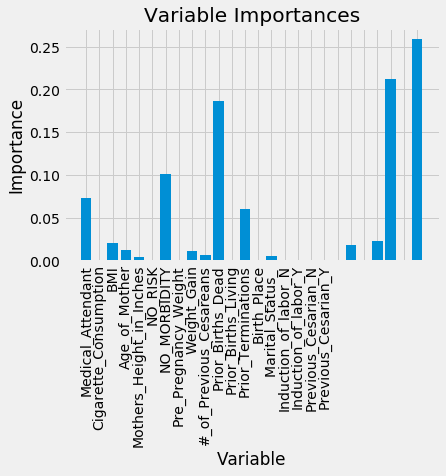

In [50]:
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, features_names2,rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

When choosing a feature to split, decision tree algorithm tries to achieve
    More predictiveness
    Less impurity
    Lower entropy
There are two ways to measure the quality of a split: Gini Impurity and Entropy.
    “Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset”. 
    Entropy is a measure of uncertainty or randomness

In [51]:
# plot the entire dataset with predictions highlighted
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');


NameError: name 'features' is not defined

In [ ]:
# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]
# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)
# Formatting plot
plt.legend(); plt.xticks(rotation = '60');
# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');